In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the data
data = pd.read_csv('/Users/sanikapoyekar/employee-attrition-prediction/data/employee_attrition.csv')

In [31]:
## 3. Preprocessing
# Drop columns that may not be useful
data = data.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [32]:
# Convert categorical variables
data = pd.get_dummies(data, drop_first=True)

In [33]:
# Target and features
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
## 4. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
## 5. Model Training
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [37]:
## 6. Evaluation
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[188  67]
 [ 16  23]]
              precision    recall  f1-score   support

       False       0.92      0.74      0.82       255
        True       0.26      0.59      0.36        39

    accuracy                           0.72       294
   macro avg       0.59      0.66      0.59       294
weighted avg       0.83      0.72      0.76       294



In [38]:
## 7. Save Model and Scaler
import os
os.makedirs("models", exist_ok=True)
joblib.dump(logreg, 'models/logistic_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']

/Users/sanikapoyekar/Applications/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Figure size 600x400 with 0 Axes>

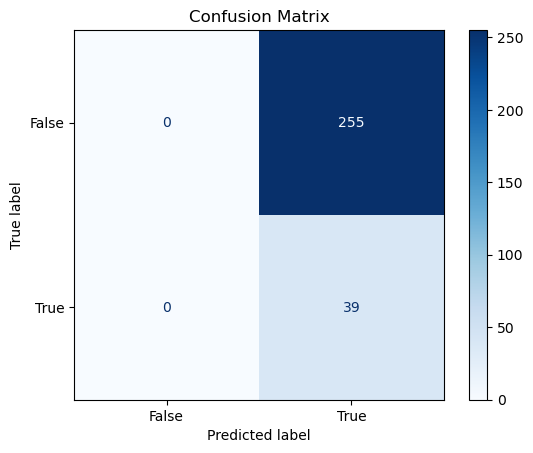

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions
y_pred = logreg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Plot
plt.figure(figsize=(6,4))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")


# Save the plot before showing or clearing it
plt.savefig('/Users/sanikapoyekar/employee-attrition-prediction/images/Confusion_Matrix.png', bbox_inches='tight')

plt.show()

/Users/sanikapoyekar/Applications/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


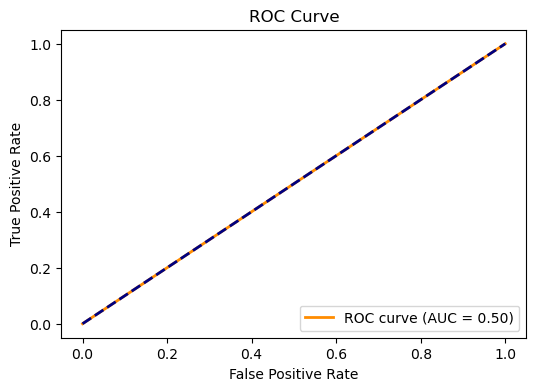

In [41]:
from sklearn.metrics import roc_curve, auc

# Probabilities for positive class
y_proba = logreg.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Save the plot before showing or clearing it
plt.savefig('/Users/sanikapoyekar/employee-attrition-prediction/images/ROCcurve.png', bbox_inches='tight')

plt.show()


In [42]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate report dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()
report_df

/Users/sanikapoyekar/Applications/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanikapoyekar/Applications/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sanikapoyekar/Applications/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,precision,recall,f1-score,support
False,0.000000,0.000000,0.000000,255.000000
True,0.132653,1.000000,0.234234,39.000000
accuracy,0.132653,0.132653,0.132653,0.132653
macro avg,0.066327,0.500000,0.117117,294.000000
weighted avg,0.017597,0.132653,0.031072,294.000000


/var/folders/c5/0gd_w4s53jgf5mnmm10_6r2c0000gn/T/ipykernel_22019/447652749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


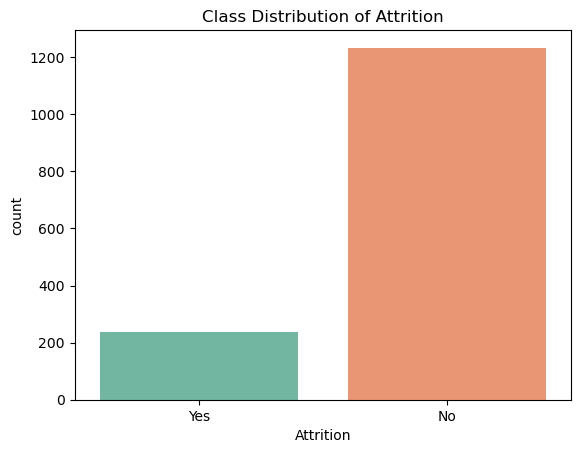

In [43]:
import seaborn as sns

sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Class Distribution of Attrition")
# Save the plot before showing or clearing it
plt.savefig('/Users/sanikapoyekar/employee-attrition-prediction/images/ClassDistributionofAttrition.png', bbox_inches='tight')
plt.show()